In [14]:
import numpy as np # linear algebra
import pandas as pd
import os
for dirname, _, filenames in os.walk("C:\\Users\\mohid\\data science\\archive (1)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\mohid\data science\archive (1)\Dasboard.gif
C:\Users\mohid\data science\archive (1)\ncr_ride_bookings.csv
C:\Users\mohid\data science\archive (1)\Uber.pbix


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

# Adjust path & filename depending on dataset
df = pd.read_csv("C:\\Users\\mohid\\data science\\archive (1)\\ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [18]:
df.shape


(150000, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [20]:
df.isnull().sum()


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

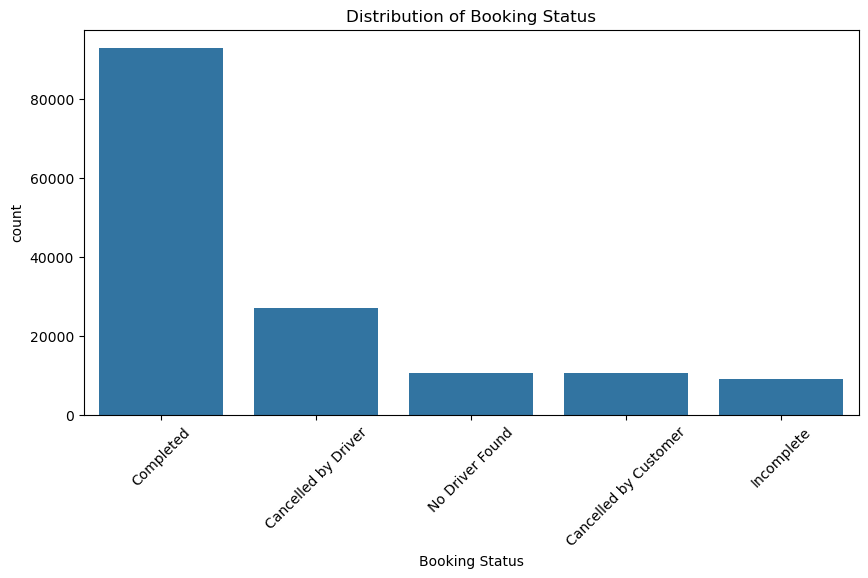

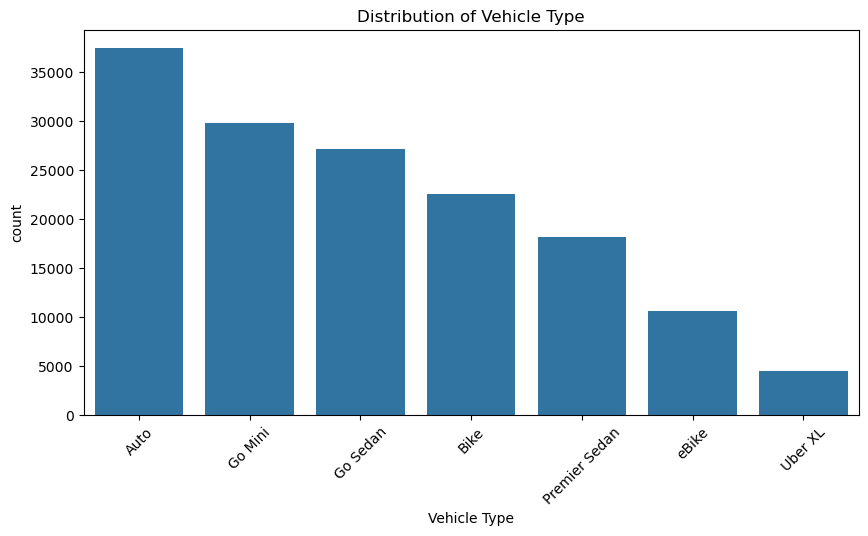

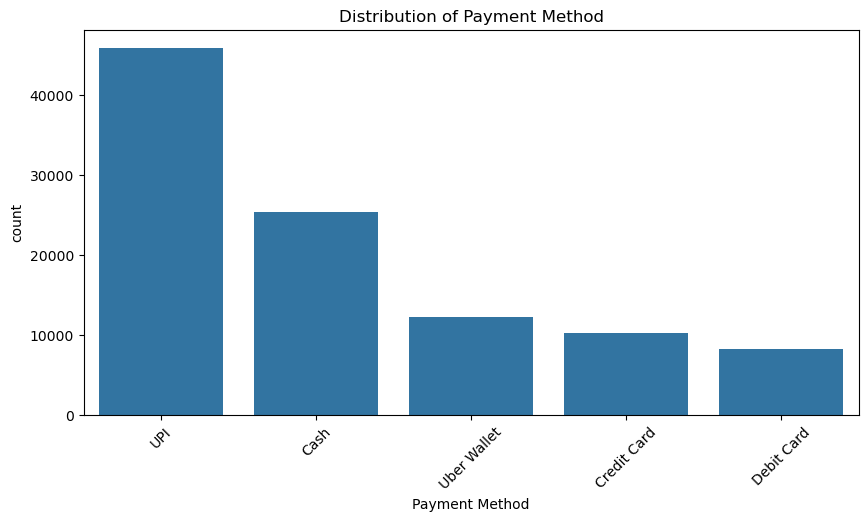

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

plot_categorical('Booking Status')
plot_categorical('Vehicle Type')
plot_categorical('Payment Method')

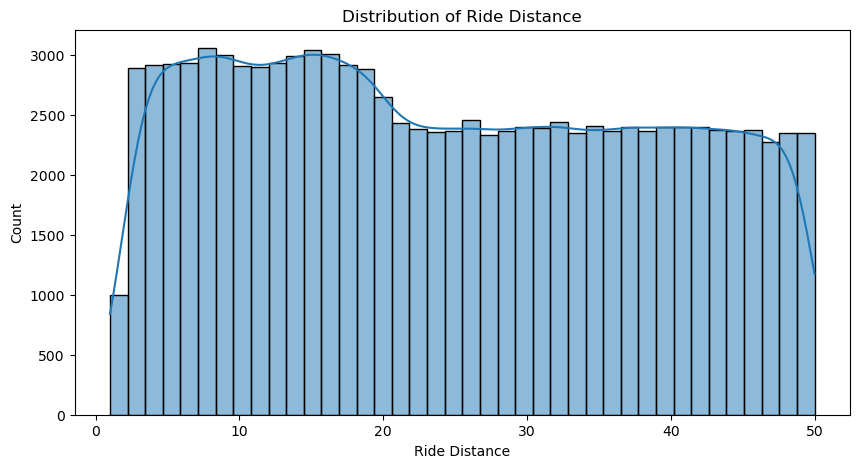

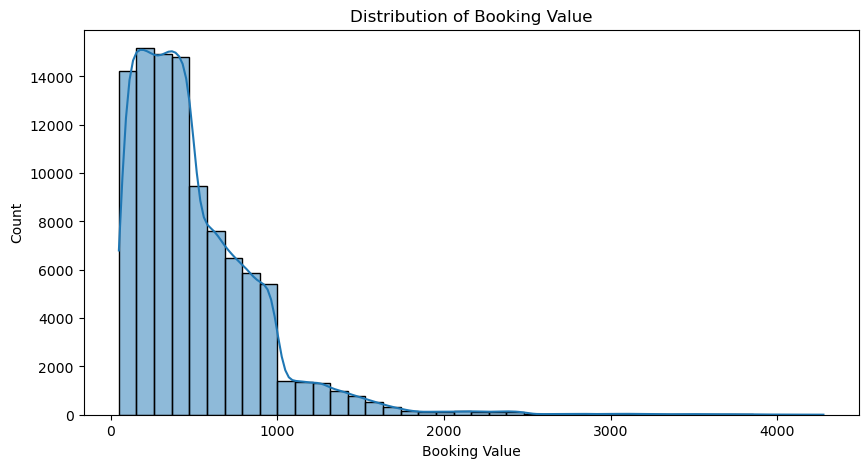

In [22]:
def plot_numerical(col):
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
plot_numerical('Ride Distance') #how long each ride was and how many rides fall into that distance range.
plot_numerical('Booking Value') #the fare charged for a ride and number of rides with that fare.


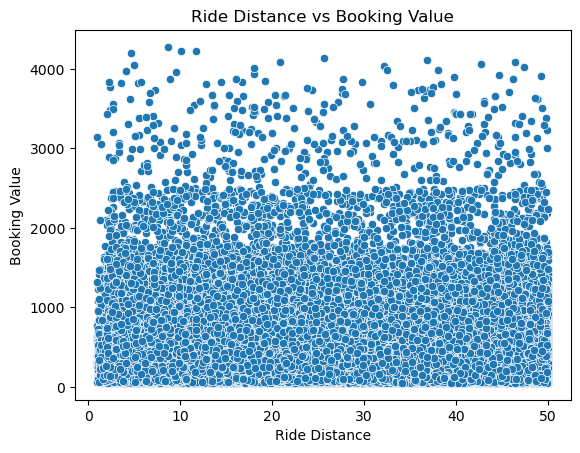

In [23]:
sns.scatterplot(x='Ride Distance', y='Booking Value', data=df)
plt.title("Ride Distance vs Booking Value")
plt.show()

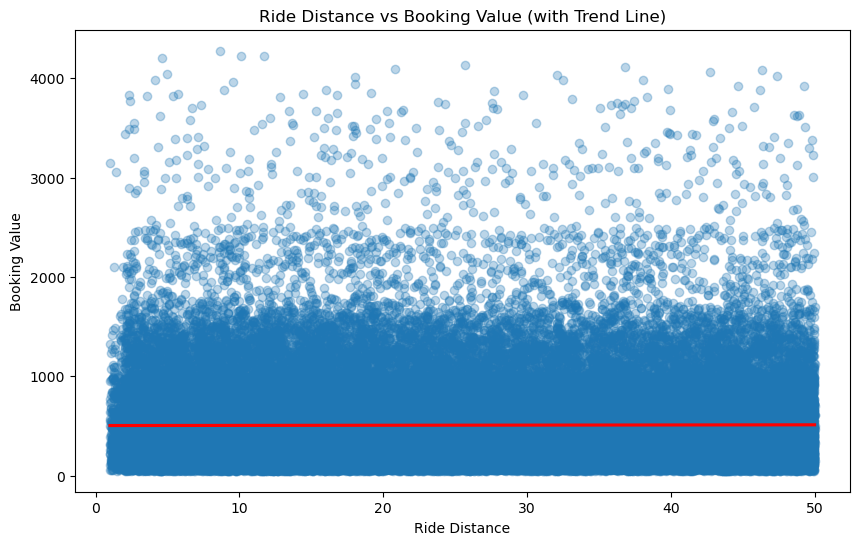

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x='Ride Distance', y='Booking Value', data=df,
            scatter_kws={'alpha':0.3},  # make dots transparent
            line_kws={'color':'red'})   # regression line
plt.title("Ride Distance vs Booking Value (with Trend Line)")
plt.show()

C:\Users\mohid\AppData\Local\Temp\ipykernel_27696\478067508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Booking Status', y='Driver Ratings', data=df, width=0.5, palette="Set2")


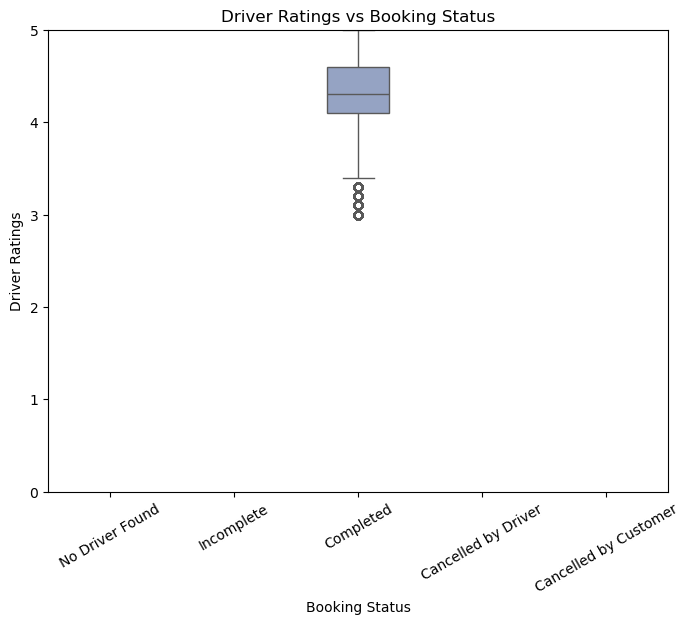

C:\Users\mohid\AppData\Local\Temp\ipykernel_27696\478067508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Booking Status', y='Customer Rating', data=df, width=0.5, palette="Set3")


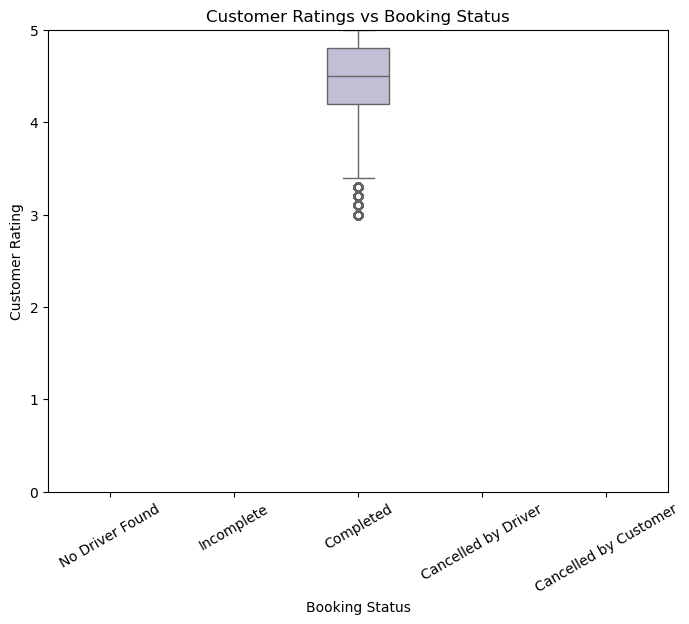

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Booking Status', y='Driver Ratings', data=df, width=0.5, palette="Set2")
plt.title("Driver Ratings vs Booking Status")#Given by the passenger (customer) to the driver after a ride.
plt.xticks(rotation=30)
plt.ylim(0,5)   # ratings usually between 0–5
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Booking Status', y='Customer Rating', data=df, width=0.5, palette="Set3")
plt.title("Customer Ratings vs Booking Status")#Given by the driver to the passenger (customer) after a ride.
plt.xticks(rotation=30)
plt.ylim(0,5)   # ratings usually between 0–5
plt.show()

In [27]:
def plot_box(cat_col, num_col):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{num_col} by {cat_col}")
    plt.show()

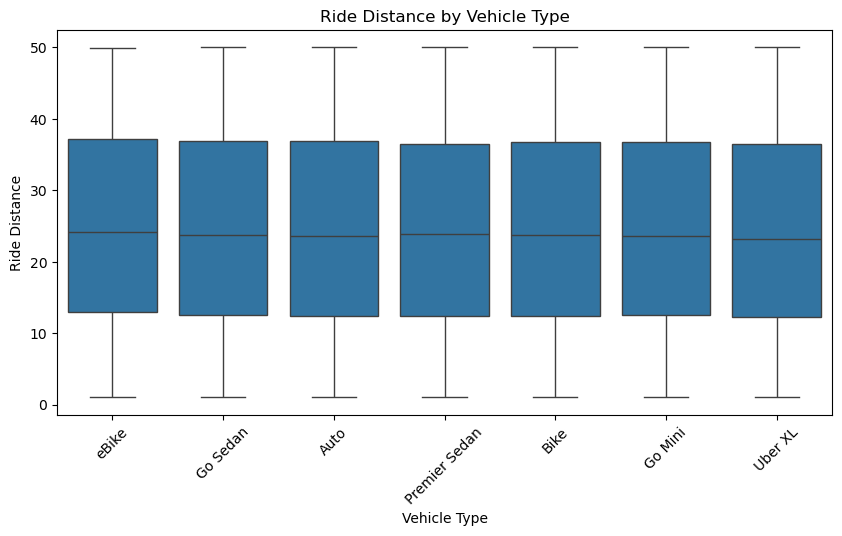

In [28]:
plot_box('Vehicle Type', 'Ride Distance')


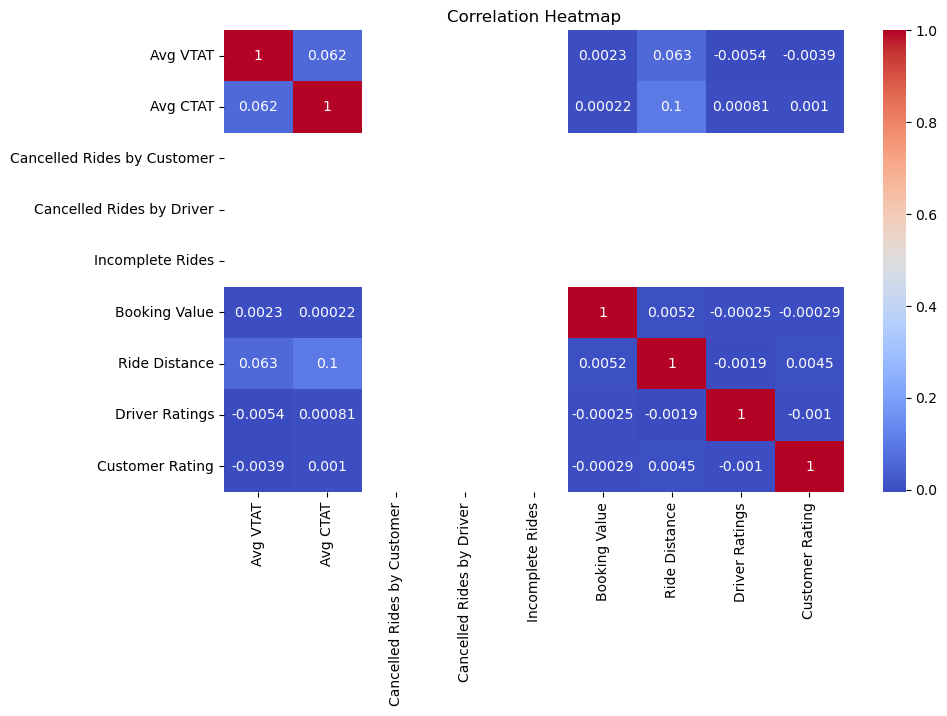

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
print(df['Incomplete Rides'].unique()[:20])

# Or show which rows are not numeric
mask = pd.to_numeric(df['Incomplete Rides'], errors='coerce').isna()
print(df.loc[mask, 'Incomplete Rides'].unique())

[nan  1.]
[nan]


In [31]:
cols_to_check = ['Cancelled Rides by Customer', 
                 'Cancelled Rides by Driver', 
                 'Incomplete Rides']

for col in cols_to_check:
    bad_vals = df.loc[pd.to_numeric(df[col], errors='coerce').isna(), col].unique()
    print(f"{col}: {bad_vals}")

Cancelled Rides by Customer: [nan]
Cancelled Rides by Driver: [nan]
Incomplete Rides: [nan]


In [32]:
df.isnull().values.any()


True

In [33]:
cols_to_check = ['Cancelled Rides by Customer', 
                 'Cancelled Rides by Driver', 
                 'Incomplete Rides']

for col in cols_to_check:
    bad_vals = df.loc[pd.to_numeric(df[col], errors='coerce').isna(), col].unique()
    print(f"{col}: {bad_vals[:10]}")

Cancelled Rides by Customer: [nan]
Cancelled Rides by Driver: [nan]
Incomplete Rides: [nan]


In [34]:
df.drop(['Cancelled Rides by Customer', 
         'Cancelled Rides by Driver', 
         'Incomplete Rides'], axis=1, inplace=True)

In [35]:
df.head(20)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,NaN,NaN,Other Issue,135.0,10.36,NaN,NaN,Cash


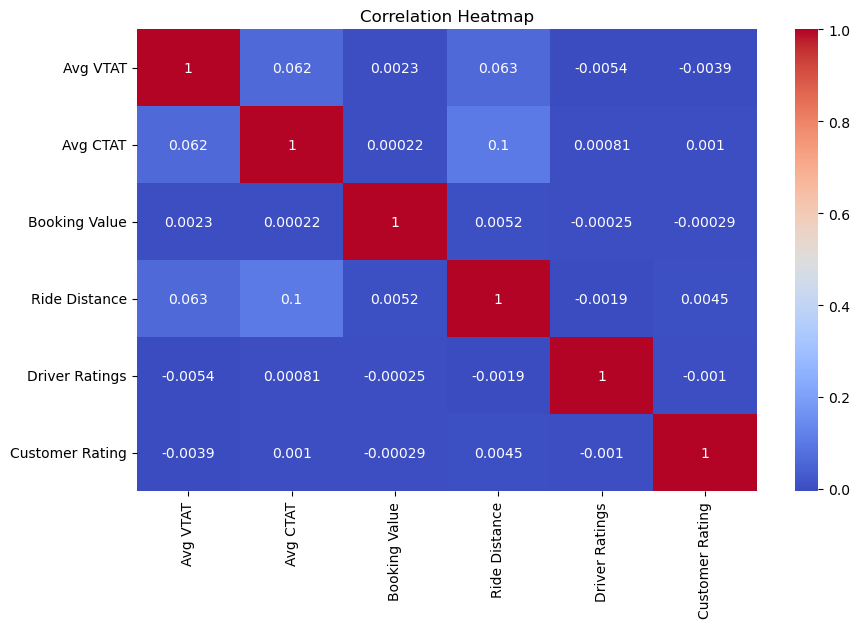

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [38]:
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 
            'Ride Distance', 'Driver Ratings', 'Customer Rating']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [39]:
print(df[num_cols].dtypes)


Avg VTAT           float64
Avg CTAT           float64
Booking Value      float64
Ride Distance      float64
Driver Ratings     float64
Customer Rating    float64
dtype: object


In [40]:
print(cat_cols)


Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location',
       'Reason for cancelling by Customer', 'Driver Cancellation Reason',
       'Incomplete Rides Reason', 'Payment Method'],
      dtype='object')


In [41]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [42]:
print(df.isnull().sum())


Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Reason for cancelling by Customer    0
Driver Cancellation Reason           0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
Payment Method                       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [44]:
target = 'Booking Value'
X = df.drop(columns=[target])   # all features except Booking Value
y = df[target]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)